In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from tensorflow import keras

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

data = pd.read_csv('Data4.csv')
data.head()


,STATION,NAME,DATE,AWND,AWND_Change,EVAP,MNPN,MXPN,PGTM,PRCP,...,WT06,WT08,WT09,WT11,WT13,WT16,WT17,WT18,WT19,WT22
0,USW00014607,"CARIBOU WEATHER FORECAST OFFICE, ME US",2012/1/1,8.28,0.44,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN
1,USW00014607,"CARIBOU WEATHER FORECAST OFFICE, ME US",40910,8.72,0.44,NaN,NaN,NaN,NaN,0.33,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN
2,USW00014607,"CARIBOU WEATHER FORECAST OFFICE, ME US",2012/1/3,8.50,-0.22,NaN,NaN,NaN,NaN,0.00,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,USW00014607,"CARIBOU WEATHER FORECAST OFFICE, ME US",2012/1/4,7.61,-0.89,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,USW00014607,"CARIBOU WEATHER FORECAST OFFICE, ME US",2012/1/5,8.50,0.89,NaN,NaN,NaN,NaN,0.00,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


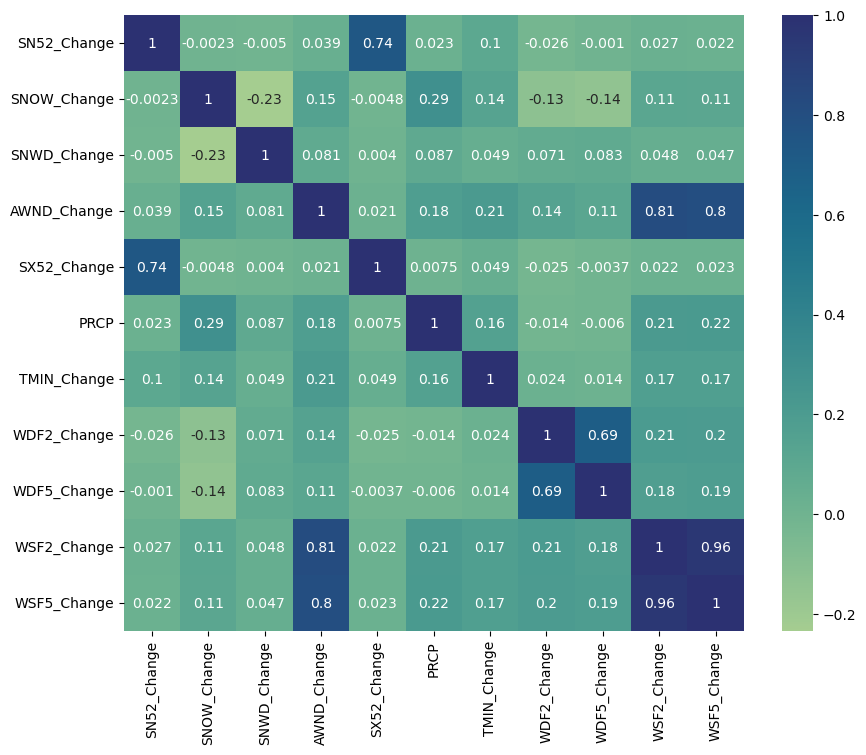

In [29]:
X = data.loc[:,['SN52_Change', 'SNOW_Change','SNWD_Change','AWND_Change','SX52_Change','PRCP','TMIN_Change','WDF2_Change','WDF5_Change','WSF2_Change','WSF5_Change']]
Y = data.loc[:,'TMAX']
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrMatrix, annot = True, cmap="crest", ax=ax)
plt.show()

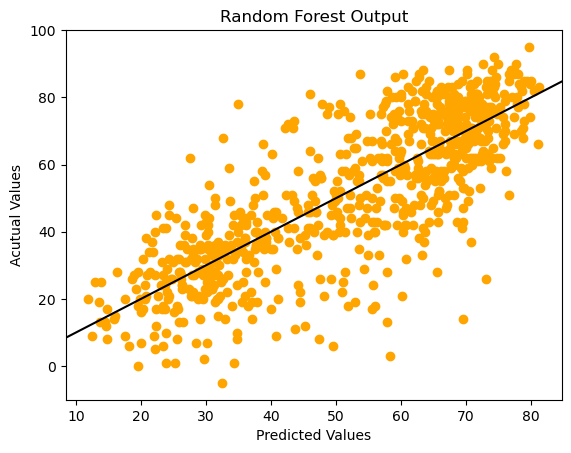

In [30]:
Xtrain, Xtest,Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 100)

mean = Xtrain.mean(axis=0)
std = Xtrain.std(axis=0)
Xtrain = (Xtrain - mean) / std 
Xtest = (Xtest - mean) / std 
model = RandomForestRegressor(**{'n_estimators': 1000, 'criterion': 'squared_error',  'max_depth': 35, 'bootstrap': True, 'max_features': None})
model.fit(Xtrain, Ytrain)
Ypredict = model.predict(Xtest)

plt.scatter(Ypredict, Ytest, color = 'orange')
plt.xlabel('Predicted Values')
plt.ylabel('Acutual Values')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.title('Random Forest Output')

_=plt.plot([-100,100],[-100,100], color = 'black')

Text(0.5, 1.0, 'Error')

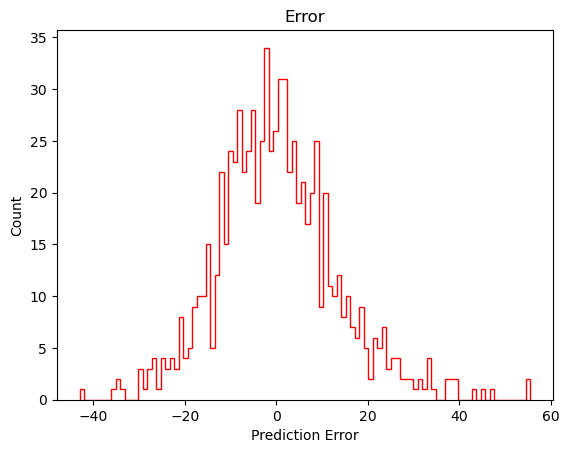

In [31]:
error = Ypredict.reshape(798,) - Ytest
plt.hist(error, bins = 100, histtype = 'step', color = 'red')
plt.xlabel("Prediction Error")
plt.ylabel("Count")
_=plt.ylabel("Count")
plt.title('Error')

In [32]:
r2 = r2_score(Ytest,Ypredict)
print('R2 Score:', r2)
mse = mean_squared_error(Ytest, Ypredict)
print('Mean Squared Error:', mse)
mae = metrics.mean_absolute_error(Ytest, Ypredict)
print('Mean Absolute Error:', mae)

R2 Score: 0.6455329739215855
Mean Squared Error: 174.56633296962409
Mean Absolute Error: 10.040751378446116


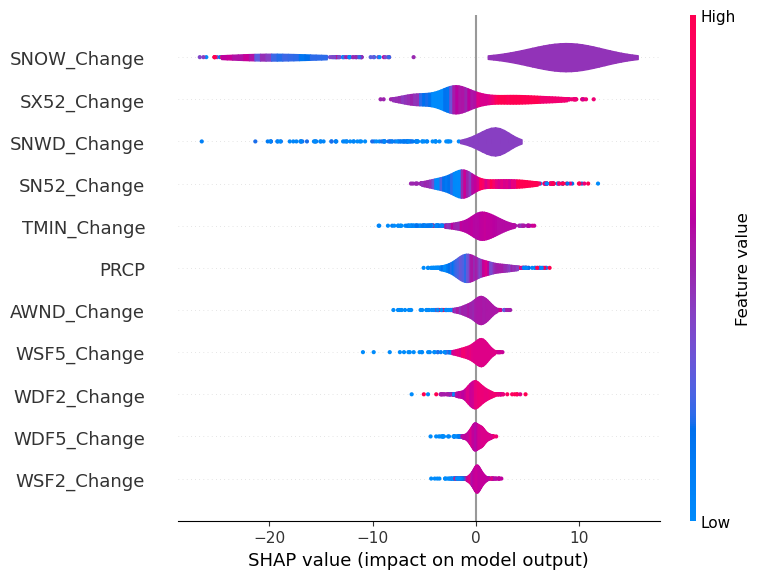

In [34]:

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xtest)
shap.summary_plot(shap_values, Xtest, plot_type = "violin")

In [37]:
for b in Ypredict:
    print(b)

29.865
79.859
33.869
38.791
73.389
69.559
67.932
75.939
71.236
30.581
63.301
57.267
61.82
41.092
70.765
60.524
67.691
78.631
29.952
63.726
20.034
71.456
55.189
38.382
77.375
59.138
59.925
36.035
69.971
35.221
46.053
70.235
68.029
65.47
31.42
73.405
60.342
53.388
50.548
47.659
31.94
40.061
24.71
12.937
71.137
65.414
31.747
35.45
63.757
59.955
68.688
75.187
64.524
27.507
81.023
25.236
73.867
68.301
69.533
79.707
59.627
50.326
57.304
67.346
74.637
63.146
69.318
13.546
65.549
63.268
67.418
58.67
16.359
52.964
54.693
64.365
78.844
62.994
19.485
72.192
49.565
47.825
45.422
30.58
32.081
70.19
73.313
65.021
43.572
28.496
38.574
64.745
65.72
52.31
54.928
52.148
23.394
34.823
19.314
60.011
69.777
63.419
61.126
51.439
25.38
32.715
31.782
57.787
68.744
73.648
46.841
69.591
71.669
40.701
78.746
68.172
66.55
23.276
70.633
70.756
72.28
36.017
53.616
67.388
47.181
30.925
72.359
65.7
48.903
30.925
40.069
33.976
19.549
48.157
76.608
43.464
50.613
68.533
56.966
60.286
19.789
22.108
33.912
49.283
73.394
6

In [38]:
for a in Ytest:
    print(a)

45
84
35
51
63
47
66
70
84
30
41
57
71
20
81
59
71
82
43
54
16
62
75
39
87
86
64
21
62
46
81
59
70
72
33
68
40
55
52
56
33
35
26
25
62
58
20
36
58
73
84
62
71
62
66
1
59
78
43
95
50
50
42
51
86
33
67
19
82
75
88
80
28
19
67
64
85
72
18
53
39
78
36
25
21
88
63
67
73
7
58
67
43
68
39
47
27
24
23
81
79
71
69
58
44
34
37
61
56
85
46
65
79
46
68
62
58
31
83
37
67
44
43
76
42
33
61
64
77
23
17
18
28
39
85
49
63
66
62
87
20
40
35
45
70
60
80
66
57
73
52
78
55
45
62
59
36
56
46
45
37
71
26
18
18
35
64
2
86
43
62
46
76
0
62
27
46
75
25
-5
17
79
35
22
66
24
62
75
67
41
26
21
34
81
17
21
22
79
61
36
28
74
47
43
34
71
75
13
44
76
24
20
26
57
66
74
77
72
72
23
47
61
40
26
29
79
51
20
17
45
80
28
25
35
85
83
41
68
58
49
34
25
84
67
81
40
90
53
51
77
34
57
52
71
63
63
48
62
88
7
82
38
75
44
31
28
17
72
77
70
56
74
69
55
21
83
7
90
28
42
48
11
81
32
46
57
25
57
50
5
78
48
60
43
63
71
63
78
74
18
74
37
38
31
63
80
6
37
75
31
66
57
65
25
70
77
1
18
84
41
42
58
34
12
85
80
36
73
54
35
76
79
70
42
22
51
3